In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
telecom_filepath = r"C:\Users\User\Documents\GitHub\25DaysInMachineLearning\24 - Day - 24 - Ensemble\Assignment\churn.csv"
df = pd.read_csv(telecom_filepath)

In [3]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [5]:
df[df.duplicated()]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?


In [7]:
df.isna().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [8]:
df.shape

(3333, 21)

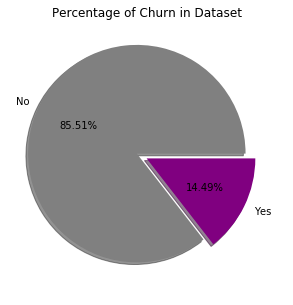

In [9]:
size = df["Churn?"].value_counts()
colors = ["grey","purple"] 
explode = (0.1, 0)
labels = 'No','Yes'


# Plot
plt.figure(figsize=(20,5))
plt.pie(size, colors=colors,explode = explode,labels = labels,
        autopct='%2.2f%%', shadow=True)
plt.title('Percentage of Churn in Dataset')
plt.show()


In [6]:
df["Churn?"].replace({"False.": 0 ,"True.": 1},inplace = True)

In [7]:
df.rename(columns = {"Churn?" : "Churn","Int'l Plan":"Intl Plan"},inplace = True)

In [8]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Intl Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

In [9]:
df["Intl Plan"].value_counts()

no     3010
yes     323
Name: Intl Plan, dtype: int64

In [10]:
df["Intl Plan"].replace({"no": 0 ,"yes": 1},inplace = True)

In [15]:
df["VMail Plan"].value_counts()

no     2411
yes     922
Name: VMail Plan, dtype: int64

In [11]:
df["VMail Plan"].replace({"no": 0 ,"yes": 1},inplace = True)

In [17]:
cat_cols = df.select_dtypes(exclude = np.number).columns

In [18]:
cat_cols

Index(['State', 'Phone'], dtype='object')

In [12]:
df.drop(columns = ['State', 'Phone','Area Code'],inplace = True)

In [20]:
df.columns

Index(['Account Length', 'Intl Plan', 'VMail Plan', 'VMail Message',
       'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins',
       'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn'],
      dtype='object')

In [21]:
df.head(3)

,Account Length,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


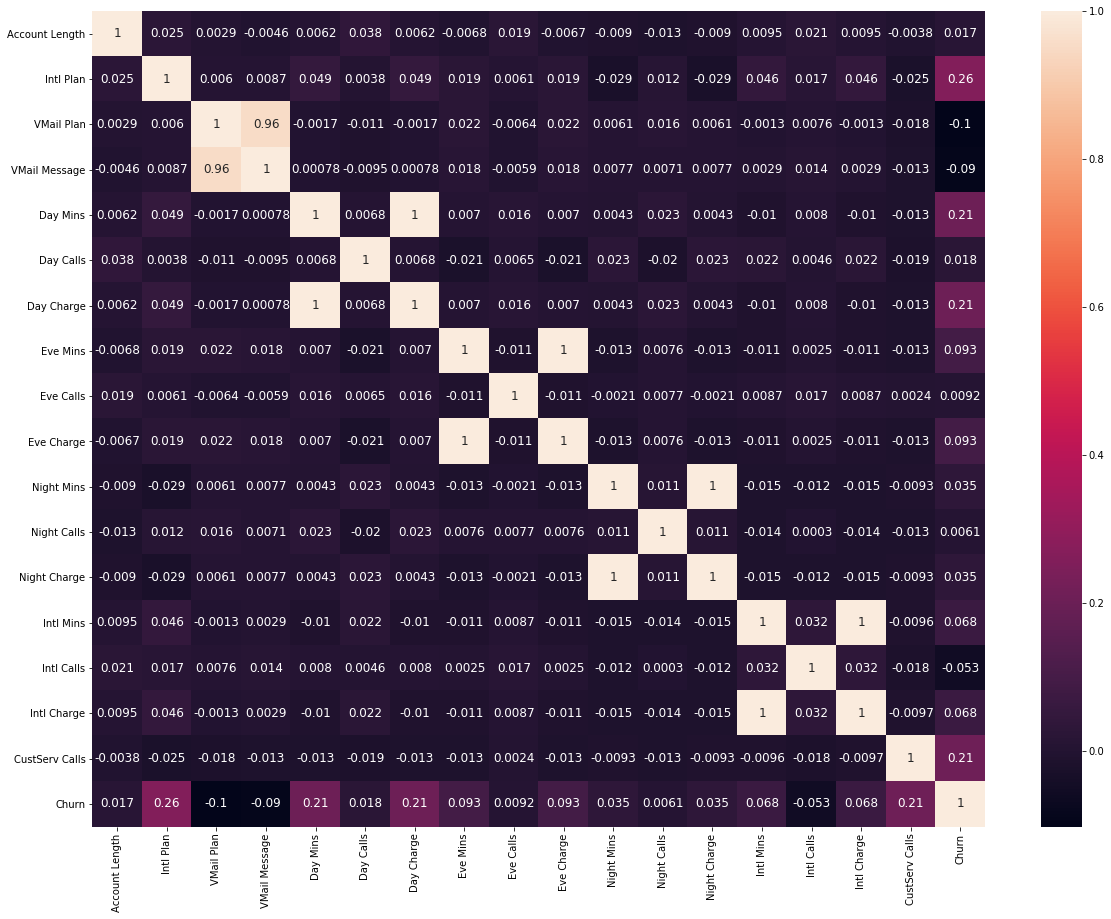

In [22]:
#df.corr()
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [13]:
X=df.drop(columns=['Churn'])
y=df['Churn']

Train Test split

In [16]:
from sklearn.model_selection import train_test_split  

Error Metric Function:

In [17]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def error_metric(actual,predict):
    confusion_matrix = metrics.confusion_matrix(actual,predict)
    confusion_matrix_df = pd.DataFrame(confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
    heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
    plt.ylabel('True label', fontsize = 14)
    plt.xlabel('Predicted label', fontsize = 14)
    
    print("The classification report is as follows...\n")
    print(classification_report(predict,actual))
    
    
    
def accuracy(actual,predict):
    print("Accuracy:",accuracy_score(actual,predict)*100)

Scaling Function:

In [27]:

def scaling(Scaler,Data):
    scaled_data = Scaler().fit(Data).transform(X.astype(float))
    print(scaled_data[0:5])


# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
test_pred = logreg.predict(X_test)
train_pred = logreg.predict(X_train)

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       642
           1       0.13      0.52      0.21        25

   micro avg       0.85      0.85      0.85       667
   macro avg       0.55      0.69      0.56       667
weighted avg       0.95      0.85      0.89       667



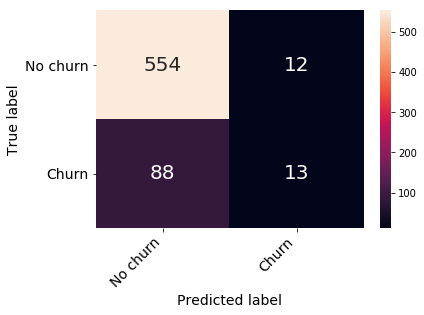

In [30]:
error_metric(y_test,test_pred)

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2544
           1       0.19      0.61      0.29       122

   micro avg       0.87      0.87      0.87      2666
   macro avg       0.59      0.74      0.61      2666
weighted avg       0.94      0.87      0.90      2666



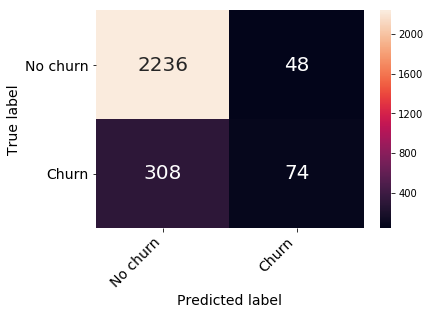

In [31]:
error_metric(y_train,train_pred)

In [32]:
accuracy(y_test, test_pred)

Accuracy: 85.00749625187406


In [33]:
accuracy(y_train, train_pred)

Accuracy: 86.64666166541636


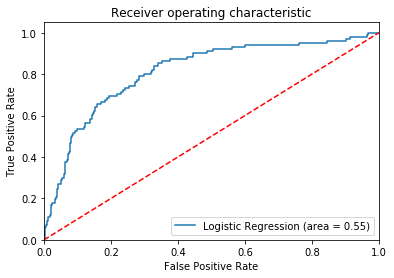

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# KNN

In [40]:
X[0:5]

,Account Length,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [35]:
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit(X).transform(X.astype(float))
scaled_data[0:5]

array([[ 0.67648946, -0.32758048,  1.6170861 ,  1.23488274,  1.56676695,
         0.47664315,  1.56703625, -0.07060962, -0.05594035, -0.07042665,
         0.86674322, -0.46549436,  0.86602851, -0.08500823, -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.14906505, -0.32758048,  1.6170861 ,  1.30794844, -0.33373776,
         1.12450284, -0.33401297, -0.10808036,  0.14486653, -0.10754944,
         1.05857074,  0.14782467,  1.05938994,  1.24048169, -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.9025285 , -0.32758048, -0.61839626, -0.59175986,  1.16830364,
         0.67598459,  1.168464  , -1.57338336,  0.49627857, -1.57389963,
        -0.75686906,  0.19893459, -0.75557074,  0.70312091,  0.21153386,
         0.69715637, -1.1882185 ],
       [-0.42859027,  3.05268496, -0.61839626, -0.59175986,  2.19659605,
        -1.46693591,  2.19675881, -2.74286476, -0.60815927, -2.7432675 ,
        -0.07855114, -0.5677142 , -0.07880574, -1.30302599,  1.02426282,
        -1.30640087

In [36]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [37]:
test_pred = neigh.predict(X_test)
train_pred = neigh.predict(X_train)

In [38]:
accuracy(y_train, train_pred)

Accuracy: 92.16054013503377


In [39]:
accuracy(y_test, test_pred)

Accuracy: 89.65517241379311


Find optimal K value

In [40]:
from math import sqrt
length = round(sqrt(df.shape[0]))
length

58

In [41]:
kvalue_dict = {}
kvalue_list = []
for k in range(1,length+1):
    model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    test_predict = model.predict(X_test)
    accur = accuracy_score(y_test, test_predict)*100
    kvalue_dict.update({k:accur})
    kvalue_list.append(accur)
    print("Test Data Accuracy for k = {} is {}" .format(k,accur))

Test Data Accuracy for k = 1 is 87.70614692653673
Test Data Accuracy for k = 2 is 87.40629685157421
Test Data Accuracy for k = 3 is 88.9055472263868
Test Data Accuracy for k = 4 is 88.1559220389805
Test Data Accuracy for k = 5 is 89.65517241379311
Test Data Accuracy for k = 6 is 88.1559220389805
Test Data Accuracy for k = 7 is 88.75562218890555
Test Data Accuracy for k = 8 is 88.6056971514243
Test Data Accuracy for k = 9 is 88.9055472263868
Test Data Accuracy for k = 10 is 87.55622188905548
Test Data Accuracy for k = 11 is 88.6056971514243
Test Data Accuracy for k = 12 is 88.1559220389805
Test Data Accuracy for k = 13 is 88.45577211394303
Test Data Accuracy for k = 14 is 88.30584707646177
Test Data Accuracy for k = 15 is 88.1559220389805
Test Data Accuracy for k = 16 is 87.25637181409296
Test Data Accuracy for k = 17 is 88.00599700149925
Test Data Accuracy for k = 18 is 87.40629685157421
Test Data Accuracy for k = 19 is 87.70614692653673
Test Data Accuracy for k = 20 is 87.406296851574

In [42]:
key_max = max(kvalue_dict.keys(), key=(lambda k: kvalue_dict[k]))

print( "The Accuracy value is ",kvalue_dict[key_max], "with k= ", key_max)

The Accuracy value is  89.65517241379311 with k=  5


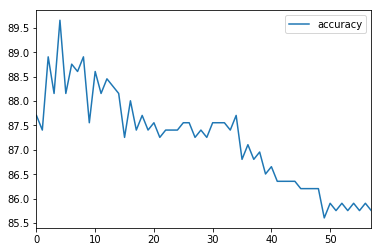

In [43]:
elbow_curve = pd.DataFrame(kvalue_list,columns = ['accuracy'])
elbow_curve.plot()

In [44]:
k = 5
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
test_pred = neigh.predict(X_test)
train_pred = neigh.predict(X_train)

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       623
           1       0.38      0.86      0.52        44

   micro avg       0.90      0.90      0.90       667
   macro avg       0.68      0.88      0.73       667
weighted avg       0.95      0.90      0.91       667



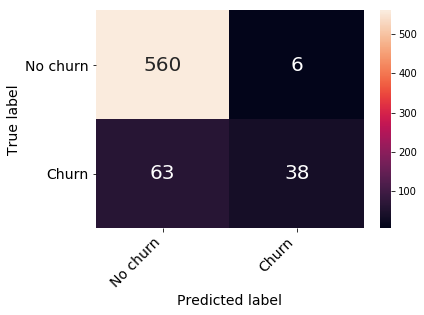

In [47]:
error_metric(y_test,test_pred)

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      2455
           1       0.50      0.91      0.65       211

   micro avg       0.92      0.92      0.92      2666
   macro avg       0.75      0.92      0.80      2666
weighted avg       0.95      0.92      0.93      2666



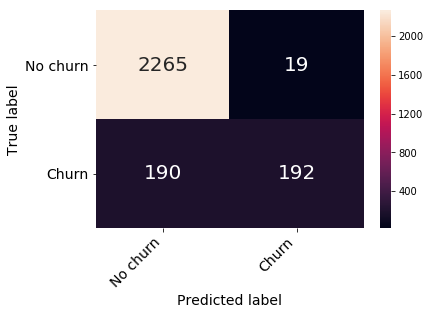

In [48]:
error_metric(y_train,train_pred)

In [49]:
accuracy(y_train, train_pred)

Accuracy: 92.16054013503377


In [50]:
accuracy(y_test, test_pred)

Accuracy: 89.65517241379311


# Naive Bayes

In [133]:
from sklearn.naive_bayes import GaussianNB

In [134]:
nbc = GaussianNB()

In [135]:
nbc.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [140]:
test_pred = nbc.predict(X_test)


In [141]:
train_pred = nbc.predict(X_train)


The classification report is as follows...

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2273
           1       0.55      0.53      0.54       393

   micro avg       0.87      0.87      0.87      2666
   macro avg       0.73      0.73      0.73      2666
weighted avg       0.87      0.87      0.87      2666



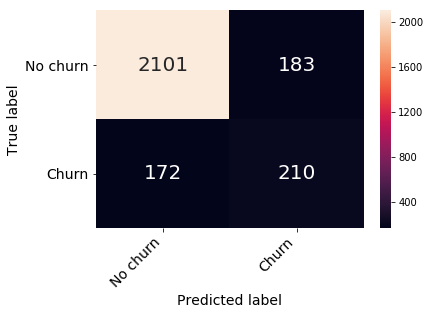

In [142]:
error_metric(y_train,train_pred)

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       575
           1       0.48      0.52      0.50        92

   micro avg       0.85      0.85      0.85       667
   macro avg       0.70      0.71      0.71       667
weighted avg       0.86      0.85      0.86       667



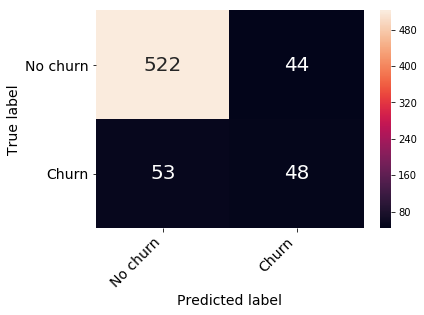

In [145]:
error_metric(y_test,test_pred)

In [143]:
accuracy(y_train, train_pred)

Accuracy: 86.6841710427607


In [144]:
accuracy(y_test, test_pred)

Accuracy: 85.45727136431785


# Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
test_pred = dt.predict(X_test)
train_pred = dt.predict(X_train)
print('Test Data Accuracy :',accuracy_score(y_test, test_pred)*100)
print('Train Data Accuracy :',accuracy_score(y_train, train_pred)*100)

Test Data Accuracy : 91.75412293853074
Train Data Accuracy : 100.0


# Tuning

In [150]:
def fit_predict(train, test, y_train, y_test, scaler, max_depth, 
                criterion = 'entropy', max_features = 1, min_samples_split = 4):
    train_scaled = scaler.fit_transform(train)
    test_scaled = scaler.transform(test)        
    dt = DecisionTreeClassifier(criterion = criterion, max_depth=max_depth, 
                                 max_features=max_features,
                               min_samples_split=min_samples_split)
    dt.fit(train_scaled, y_train)
    test_pred = dt.predict(test_scaled)
    train_pred = dt.predict(train_scaled)
    print('Test Data Accuracy :', accuracy_score(y_test, test_pred)*100)
    print('Train Data Accuracy :', accuracy_score(y_train, train_pred)*100)
    

Max depth

In [63]:
for i in range(1, 20):
    print('max_depth =', i, end = '\n ')
    fit_predict(X_train, X_test, y_train, y_test, StandardScaler(), i)

max_depth = 1
 Test Data Accuracy : 84.8575712143928
max_depth = 2
 Test Data Accuracy : 84.8575712143928
max_depth = 3
 Test Data Accuracy : 84.8575712143928
max_depth = 4
 Test Data Accuracy : 88.30584707646177
max_depth = 5
 Test Data Accuracy : 88.00599700149925
max_depth = 6
 Test Data Accuracy : 87.25637181409296
max_depth = 7
 Test Data Accuracy : 84.70764617691154
max_depth = 8
 Test Data Accuracy : 86.95652173913044
max_depth = 9
 Test Data Accuracy : 85.45727136431785
max_depth = 10
 Test Data Accuracy : 87.25637181409296
max_depth = 11
 Test Data Accuracy : 85.90704647676162
max_depth = 12
 Test Data Accuracy : 85.00749625187406
max_depth = 13
 Test Data Accuracy : 85.75712143928035
max_depth = 14
 Test Data Accuracy : 86.05697151424287
max_depth = 15
 Test Data Accuracy : 84.55772113943029
max_depth = 16
 Test Data Accuracy : 86.20689655172413
max_depth = 17
 Test Data Accuracy : 82.15892053973015
max_depth = 18
 Test Data Accuracy : 82.00899550224887
max_depth = 19
 Test D

Max Features

In [151]:
for i in np.arange(0.1, 1.0, 0.1):
    print('max features =', i, end = '\n ')
    fit_predict(X_train, X_test, y_train, y_test, StandardScaler(), max_depth = 9, max_features=i)

max features = 0.1
 Test Data Accuracy : 88.6056971514243
Train Data Accuracy : 92.6106526631658
max features = 0.2
 Test Data Accuracy : 88.45577211394303
Train Data Accuracy : 96.0615153788447
max features = 0.30000000000000004
 Test Data Accuracy : 90.55472263868066
Train Data Accuracy : 96.28657164291073
max features = 0.4
 Test Data Accuracy : 90.10494752623688
Train Data Accuracy : 96.43660915228807
max features = 0.5
 Test Data Accuracy : 93.25337331334332
Train Data Accuracy : 97.59939984996248
max features = 0.6
 Test Data Accuracy : 92.35382308845578
Train Data Accuracy : 97.78694673668417
max features = 0.7000000000000001
 Test Data Accuracy : 93.55322338830585
Train Data Accuracy : 97.37434358589647
max features = 0.8
 Test Data Accuracy : 93.55322338830585
Train Data Accuracy : 97.89947486871718
max features = 0.9
 Test Data Accuracy : 94.00299850074963
Train Data Accuracy : 97.93698424606151


Min samples split

In [152]:
for i in range(2, 10):
    print('min samples split =', i, end = '\n ')
    fit_predict(X_train, X_test, y_train, y_test, StandardScaler(), 9, max_features=0.5, min_samples_split=i)

min samples split = 2
 Test Data Accuracy : 93.25337331334332
Train Data Accuracy : 97.93698424606151
min samples split = 3
 Test Data Accuracy : 93.25337331334332
Train Data Accuracy : 97.22430607651913
min samples split = 4
 Test Data Accuracy : 93.4032983508246
Train Data Accuracy : 97.33683420855213
min samples split = 5
 Test Data Accuracy : 92.05397301349325
Train Data Accuracy : 97.03675918979745
min samples split = 6
 Test Data Accuracy : 92.50374812593704
Train Data Accuracy : 97.37434358589647
min samples split = 7
 Test Data Accuracy : 92.65367316341829
Train Data Accuracy : 97.07426856714179
min samples split = 8
 Test Data Accuracy : 94.15292353823088
Train Data Accuracy : 96.99924981245312
min samples split = 9
 Test Data Accuracy : 93.55322338830585
Train Data Accuracy : 96.92423105776444


Criterion Tuning

In [153]:
for i in ['gini', 'entropy']:
    print('criterion =', i, end = '\n ')
    fit_predict(X_train, X_test, y_train, y_test, StandardScaler(), 9, 
                max_features=0.5, min_samples_split=4, criterion = i)

criterion = gini
 Test Data Accuracy : 92.95352323838081
Train Data Accuracy : 97.52438109527381
criterion = entropy
 Test Data Accuracy : 93.55322338830585
Train Data Accuracy : 97.37434358589647


Better parameter values after Tuning

In [154]:
fit_predict(X_train, X_test, y_train, y_test, StandardScaler(), 9, 
                max_features=0.5, min_samples_split=4, criterion = 'entropy')

Test Data Accuracy : 93.7031484257871
Train Data Accuracy : 97.63690922730682


# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 10, max_depth=None, 
                                random_state = 42, max_features = 'auto',
                               min_samples_split = 2)
RF.fit(X_train, y_train)
test_pred = RF.predict(X_test)
train_pred = RF.predict(X_train)
print("Test Accuracy : ",accuracy_score(y_test, test_pred)*100)
print("Train Accuracy : ",accuracy_score(y_train, train_pred)*100)

Test Accuracy :  94.45277361319341
Train Accuracy :  99.36234058514628


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [1,5,10,15,20,25,30], 'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ], 
 'min_samples_leaf': [1, 3, 5, 10, 25], 'bootstrap': [True, False]}
]

forest = RandomForestClassifier(n_jobs=-1)

grid_search_forest = GridSearchCV(forest, param_grid, cv=10, scoring='accuracy')
grid_search_forest.fit(X_train, y_train)

In [71]:
# Best Parameters from Tuning
print(grid_search_forest.best_params_)

{'bootstrap': True, 'max_features': 0.4, 'min_samples_leaf': 1, 'n_estimators': 15}


In [72]:
# Finding Best Features from Tuning
print(grid_search_forest.best_estimator_.feature_importances_)

[0.02293303 0.09149316 0.02185765 0.03121257 0.15391713 0.02830562
 0.11170988 0.07626862 0.0231241  0.0611932  0.03151649 0.02377608
 0.03038769 0.04185298 0.07456246 0.04959264 0.12629668]


In [155]:
#Fit the model after finding best parameters      
RF = RandomForestClassifier(n_estimators = 30, max_depth=None, 
                                random_state = 42, max_features = 0.5,
                               min_samples_leaf = 1,bootstrap = True)
RF.fit(X_train, y_train)
test_pred = RF.predict(X_test)
train_pred = RF.predict(X_train)
print("Test Accuracy : ",accuracy_score(y_test, test_pred)*100)
print("Train Accuracy : ",accuracy_score(y_train, train_pred)*100)

Test Accuracy :  95.35232383808095
Train Accuracy :  99.77494373593399


# Boosting

In [63]:
from sklearn.ensemble import AdaBoostClassifier
dtree = DecisionTreeClassifier(criterion='gini',max_depth=1)

adabst_fit = AdaBoostClassifier(base_estimator= dtree,
        n_estimators=5000,learning_rate=0.05,random_state=42)

adabst_fit.fit(X_train, y_train)
     
print ("\nAdaBoost  - Train accuracy:", accuracy_score(y_train,adabst_fit.predict(X_train))*100)
print ("\nAdaBoost  - Test accuracy:", accuracy_score(y_test,adabst_fit.predict(X_test))*100)



AdaBoost  - Train accuracy: 90.28507126781695

AdaBoost  - Test accuracy: 87.40629685157421


# Gradientboost Classifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_fit = GradientBoostingClassifier(loss='deviance',learning_rate=0.05,n_estimators=5000,
                                     min_samples_split=2,min_samples_leaf=1,max_depth=None,random_state=42 )
gbc_fit.fit(X_train,y_train)


print ("\nGradient Boost - Train accuracy", accuracy_score(y_train,gbc_fit.predict(X_train))*100)
print ("\nGradient Boost - Test accuracy", accuracy_score(y_test,gbc_fit.predict(X_test))*100)



Gradient Boost - Train accuracy 100.0

Gradient Boost - Test accuracy 92.95352323838081
